In [1]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    movie_reviews_data_folder = "../scikit-learn/doc/tutorial/text_analytics/data/movie_reviews/txt_sentoken"
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=None)

n_samples: 2000


In [2]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent    
pipeline = Pipeline([("vect", TfidfVectorizer(min_df = 3, max_df = 0.95)),
                     ("clf", LinearSVC(C = 1000))
                     ])


In [3]:
# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
params = {"vect__ngram_range": [(1,1), (1,2), (1,3), (1,4)],
          "vect__sublinear_tf": [True],
          "clf__max_iter": [1000]
         }
grid_search = GridSearchCV(pipeline, params, n_jobs = -1)
grid_search.fit(docs_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'vect__sublinear_tf': [True], 'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)], 'clf__max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [4]:
# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print(grid_search.grid_scores_)

[mean: 0.85333, std: 0.01112, params: {'vect__sublinear_tf': True, 'vect__ngram_range': (1, 1), 'clf__max_iter': 1000}, mean: 0.87333, std: 0.01370, params: {'vect__sublinear_tf': True, 'vect__ngram_range': (1, 2), 'clf__max_iter': 1000}, mean: 0.87533, std: 0.01112, params: {'vect__sublinear_tf': True, 'vect__ngram_range': (1, 3), 'clf__max_iter': 1000}, mean: 0.87600, std: 0.01071, params: {'vect__sublinear_tf': True, 'vect__ngram_range': (1, 4), 'clf__max_iter': 1000}]


In [5]:
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

In [6]:
# Good review for AOA
r1 = "Cast chosen are all well suited to the characters; they performed as if the story was theirs to share ~ A love story that will test the assumptions of viewers. Enjoyable, well acted, well done. A plausible plot supported by characters and settings that make plausible more than probable. Our preview audience appeared surprised at the chance to see a great cast in a simple story of love. Laughter because Harrison Ford holds a mirror to the lives of the audience, and we see ourselves. Blake Lively never gives us a hint of deviation from her assumed promise. Lots of historical fact that interests rather than bores the mind, and never obscures the journey we're following with the characters. Michiel Huisman plays innocence with persistence, grace, and a smile; we laugh and cheer him on. Ellen Burstyn plays a subtle catalyst role. Kathy Baker always seems to pull the characters together, and none of the cast can take away our interest from the science and character of Adaline. I'll see it again, in the theater for the larger than life characters. Thanks crew, staff, and actors."
# Good review for AOA
r2 = "I have been looking forward to this film because of the story line. There are so many things to like about it - the flashbacks are well done and so believable. The costumes are so fun to watch. I do not think I have seen Blake Lively act before and I was clearly entranced by her performance. She carries the film so well and is so quiet and well done. I liked the actors - Michaeil Haisman is gorgeous and believable. Harrison Ford - so happy to see him in a movie again - and he is also believable as the father of Ellis. Elen Burnstyn is delightful. This story could have been presented in such a different manner - director Lee Toland Kreiger got it, and it is beautiful story-telling. I love the last scene."
# Bad review for AOA
r3 = "So I went to this movie with no expectations. The first two minutes seems interesting. Adaline seems like she is going to use her years of living to provide some wisdom to the young man making her IDs. Then it takes a nose dive from there. For someone that has lived 107 years, she never truly experienced loss. Of course she loses her first husband but you see that in a brief flashback that had an unnecessary narration added to it. Then you meet the creepy stalker type Ellis. Not only can the actor not give a believable performance, but there was absolutely no chemistry between the two main characters. Another flashback happens to the 1960s and we find out that Adaline loved someone else and I thought well maybe that's what they are building too that she is still holding on to that love. Spoiler, No that's not the case. I was really disappointed with Harrison Ford's performance also. The whole movie reminded me of bad SyFy flick that is aired on a Saturday afternoon. Save yourself some money because you won't lose yourself in any performance of this movie."

r4 = "Luther College Computer Science"
#Good review for HD
r5 = "The WD RE series SATA III drives are outstanding enterprise drives. Designed for long life in server use with a 24X7 duty cycle they are ideal for that environment. Their 5 year warranty speaks to their reliability. With Time Limited Error Recovery (TLER) the RE series drives are well suited RAID based applications which are not suitable for desktop drives which can give false failures with their extended error recovery timings. The RE drives are economically priced with a relatively low cost per gigabyte and a wide range of capacities from 250GB up to 4TB. I recently installed a pair of RE drives in a client server in a RAID1 configuration. As I've come to expect they worked perfectly and with some initial testing are slightly faster than the RE4 drives that were already in this server. I been running dozens of servers for myself and my clients for decades and using the Western Digital RE series of enterprise drives since the RE3 line came out. I've continued throughout the RE4 drives and now the RE (no number) which are the latest and appear to be even better than than the predecessors. These RE series drives have been very reliable with no failures in years. When I want reliable and economical server storage the RE drives are the center of my comfort zone. To improve performance even more I have started using smallish SSD drives for some server applications; using a SSD RAID1 for the OS and RE drives in RAID1 for the bulk data storage. This can really boost server performance while balancing costs. If you put these into a desktop PC don't expect them to be super quiet! They are not very quiet drives which is fine in most server applications. Overall Western Digital has demonstrated continued improvement in their enterprise RE drives. When I want drives I can depend on for solid performance in a 24X7 environment RE is my go to drive. Hope this helps someone!"
#Bad review for Monitor
r6 = "After 6 months of use this monitor went out. It just got green lines running through it that got longer & wider every time it was turned on. It was a cool monitor until that. Sad, and now have to go buy a new monitor. My old Samsung monitors never had issues like this."

# Two 3-Star reviews
r7 = "since the monitor has different inputs, it should come with different cables. Not with this one, the only cable you get is a vga cable. I had to put my own vga-to-dvi adapter on the cable to get it to work with my EVGA 285 video card. That video card doesn't have a HDMI connection so I can't use that option but in a few days I will be able to; hopefully that will fix how this monitor looks. It's pretty dark on the top of the screen and WAY too bright on the bottom. Everything else is fine; the buttons/menu are great. But if you can't use the HDMI connection, don't get this monitor."
r8 = "Lets start with the cons. After installing the stand to the monitor, I noticed that the monitor is not very sturdy and wobbles with any movement. Even when pressing the the buttons to configure the brightness, the monitor itself would wobble. Another thing to note the monitor does not offer much tilt adjusting. It allows only tilting up and down and the range is not very much. If you are viewing from a higher position, the tilt might not meet your needs. The setting out of the box had the brightness at 100%. After turning it down, I noticed a few things. Even when looking at the monitor from a straight position, I noticed the brightness and the color of the top of the display seemed distorted. While looking from a high, low, left or right angle the display shows a big drop in brightness and color. As far as the pros of this monitor, it does offer a very nice picture from a straight direct view. The picture is sharp and the colors are vivid for an anti-glare display. There is absolutely no glare at all even in a bright room which is a huge plus. The asthetics are very nice with a black glossy finish. The monitor is very light and has a very thin profile. Does not take up much space on the desk especially considering its a 24 monitor. The menu options were user friendly with many options to adjust the picture and settings. So my recommendation would boil down to the price and usage. If you get this monitor at a good price ($90-110) then I would say thats a deal for a 24 monitor with slight issues. For me, I got this monitor on sale in that range so I am planning on keeping it as a second monitor. I have multiple Samsung HDTVs in my home and I suppose I was expecting a much better product. But for the price I got it for, I guess it was a decent deal."

print(grid_search.predict([r1, r2, r3, r4, r5, r6, r7, r8]))


[1 1 0 0 1 0 0 1]


             precision    recall  f1-score   support

        neg       0.86      0.88      0.87       256
        pos       0.87      0.86      0.86       244

avg / total       0.87      0.87      0.87       500

[[224  32]
 [ 35 209]]


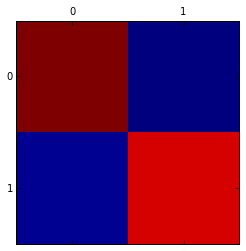

In [7]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.show()